# Assignment X: Word Embeddings


## Question 1

- Alice in the wonderland
- verbs?
- word embeddings/

## Alice Corpus

In [1]:
import nltk
from nltk.corpus import gutenberg
import re
import pandas as pd
from gensim.models import word2vec
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi']= 300
#%matplotlib inline

In [2]:
#print(gutenberg.fileids())
alice = gutenberg.sents('carroll-alice.txt')

# remove tokens that contain non-alphanumeric chars
alice_norm = [[w.lower() for w in sent if not re.match(r'\W', w)] for sent in alice]
# concatenate tokens into long strings
alice_norm = [' '.join(sent) if len(sent)>2 else None for sent in alice_norm]


## check short lines with less than 2 tokens
# print([t for (t,s) in zip(alice,alice_norm) if s==None])

print("Number of Sentences:", len(alice_norm))
print("Sample Line (Raw):", alice[20])
print("Sample Line (Norm):", alice_norm[20])

Number of Sentences: 1703
Sample Line (Raw): ['Would', 'the', 'fall', 'NEVER', 'come', 'to', 'an', 'end', '!']
Sample Line (Norm): would the fall never come to an end


In [3]:
%%time

# tokenize sentences in corpus
wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in alice_norm if document != None]

# Set values for various parameters
feature_size = 100    # Word vector dimensionality  
window_context = 5          # Context window size                                                                                    
min_word_count = 5   # Minimum word count                        
sample = 1e-3   # Downsample setting for frequent words

w2v_model_alice = word2vec.Word2Vec(tokenized_corpus, size=feature_size, 
                          window=window_context, min_count=min_word_count,
                          sample=sample, iter=50, sg = 1) # `sg=1` for skip-gram; `sg=0` for CBOW

# view similar words based on gensim's model
similar_words = {search_term: [item[0] for item in w2v_model_alice.wv.most_similar([search_term], topn=5)]
                  for search_term in ['alice', 'rabbit', 'queen', 'king', 'cat','caterpillar','hatter','could','would']}
print(similar_words)

{'alice': ['she', 'feeling', 'politely', 'frightened', 'hastily'], 'rabbit': ['white', 'kid', 'hole', 'loud', 'fan'], 'queen': ['executioner', 'hearts', 'reply', 'shrill', 'ground'], 'king': ['executioner', 'important', 'unimportant', 'jury', 'aloud'], 'cat': ['cheshire', 'cats', 'somebody', 'grin', 'our'], 'caterpillar': ['hookah', 'father', 'cook', 'lory', 'william'], 'hatter': ['hare', 'tea', 'dormouse', 'march', 'isn'], 'could': ['pack', 'swim', 'even', 'join', 'dare'], 'would': ['simple', 'makes', 'lobsters', 'told', 'dance']}
CPU times: user 4.06 s, sys: 48.8 ms, total: 4.11 s
Wall time: 1.96 s


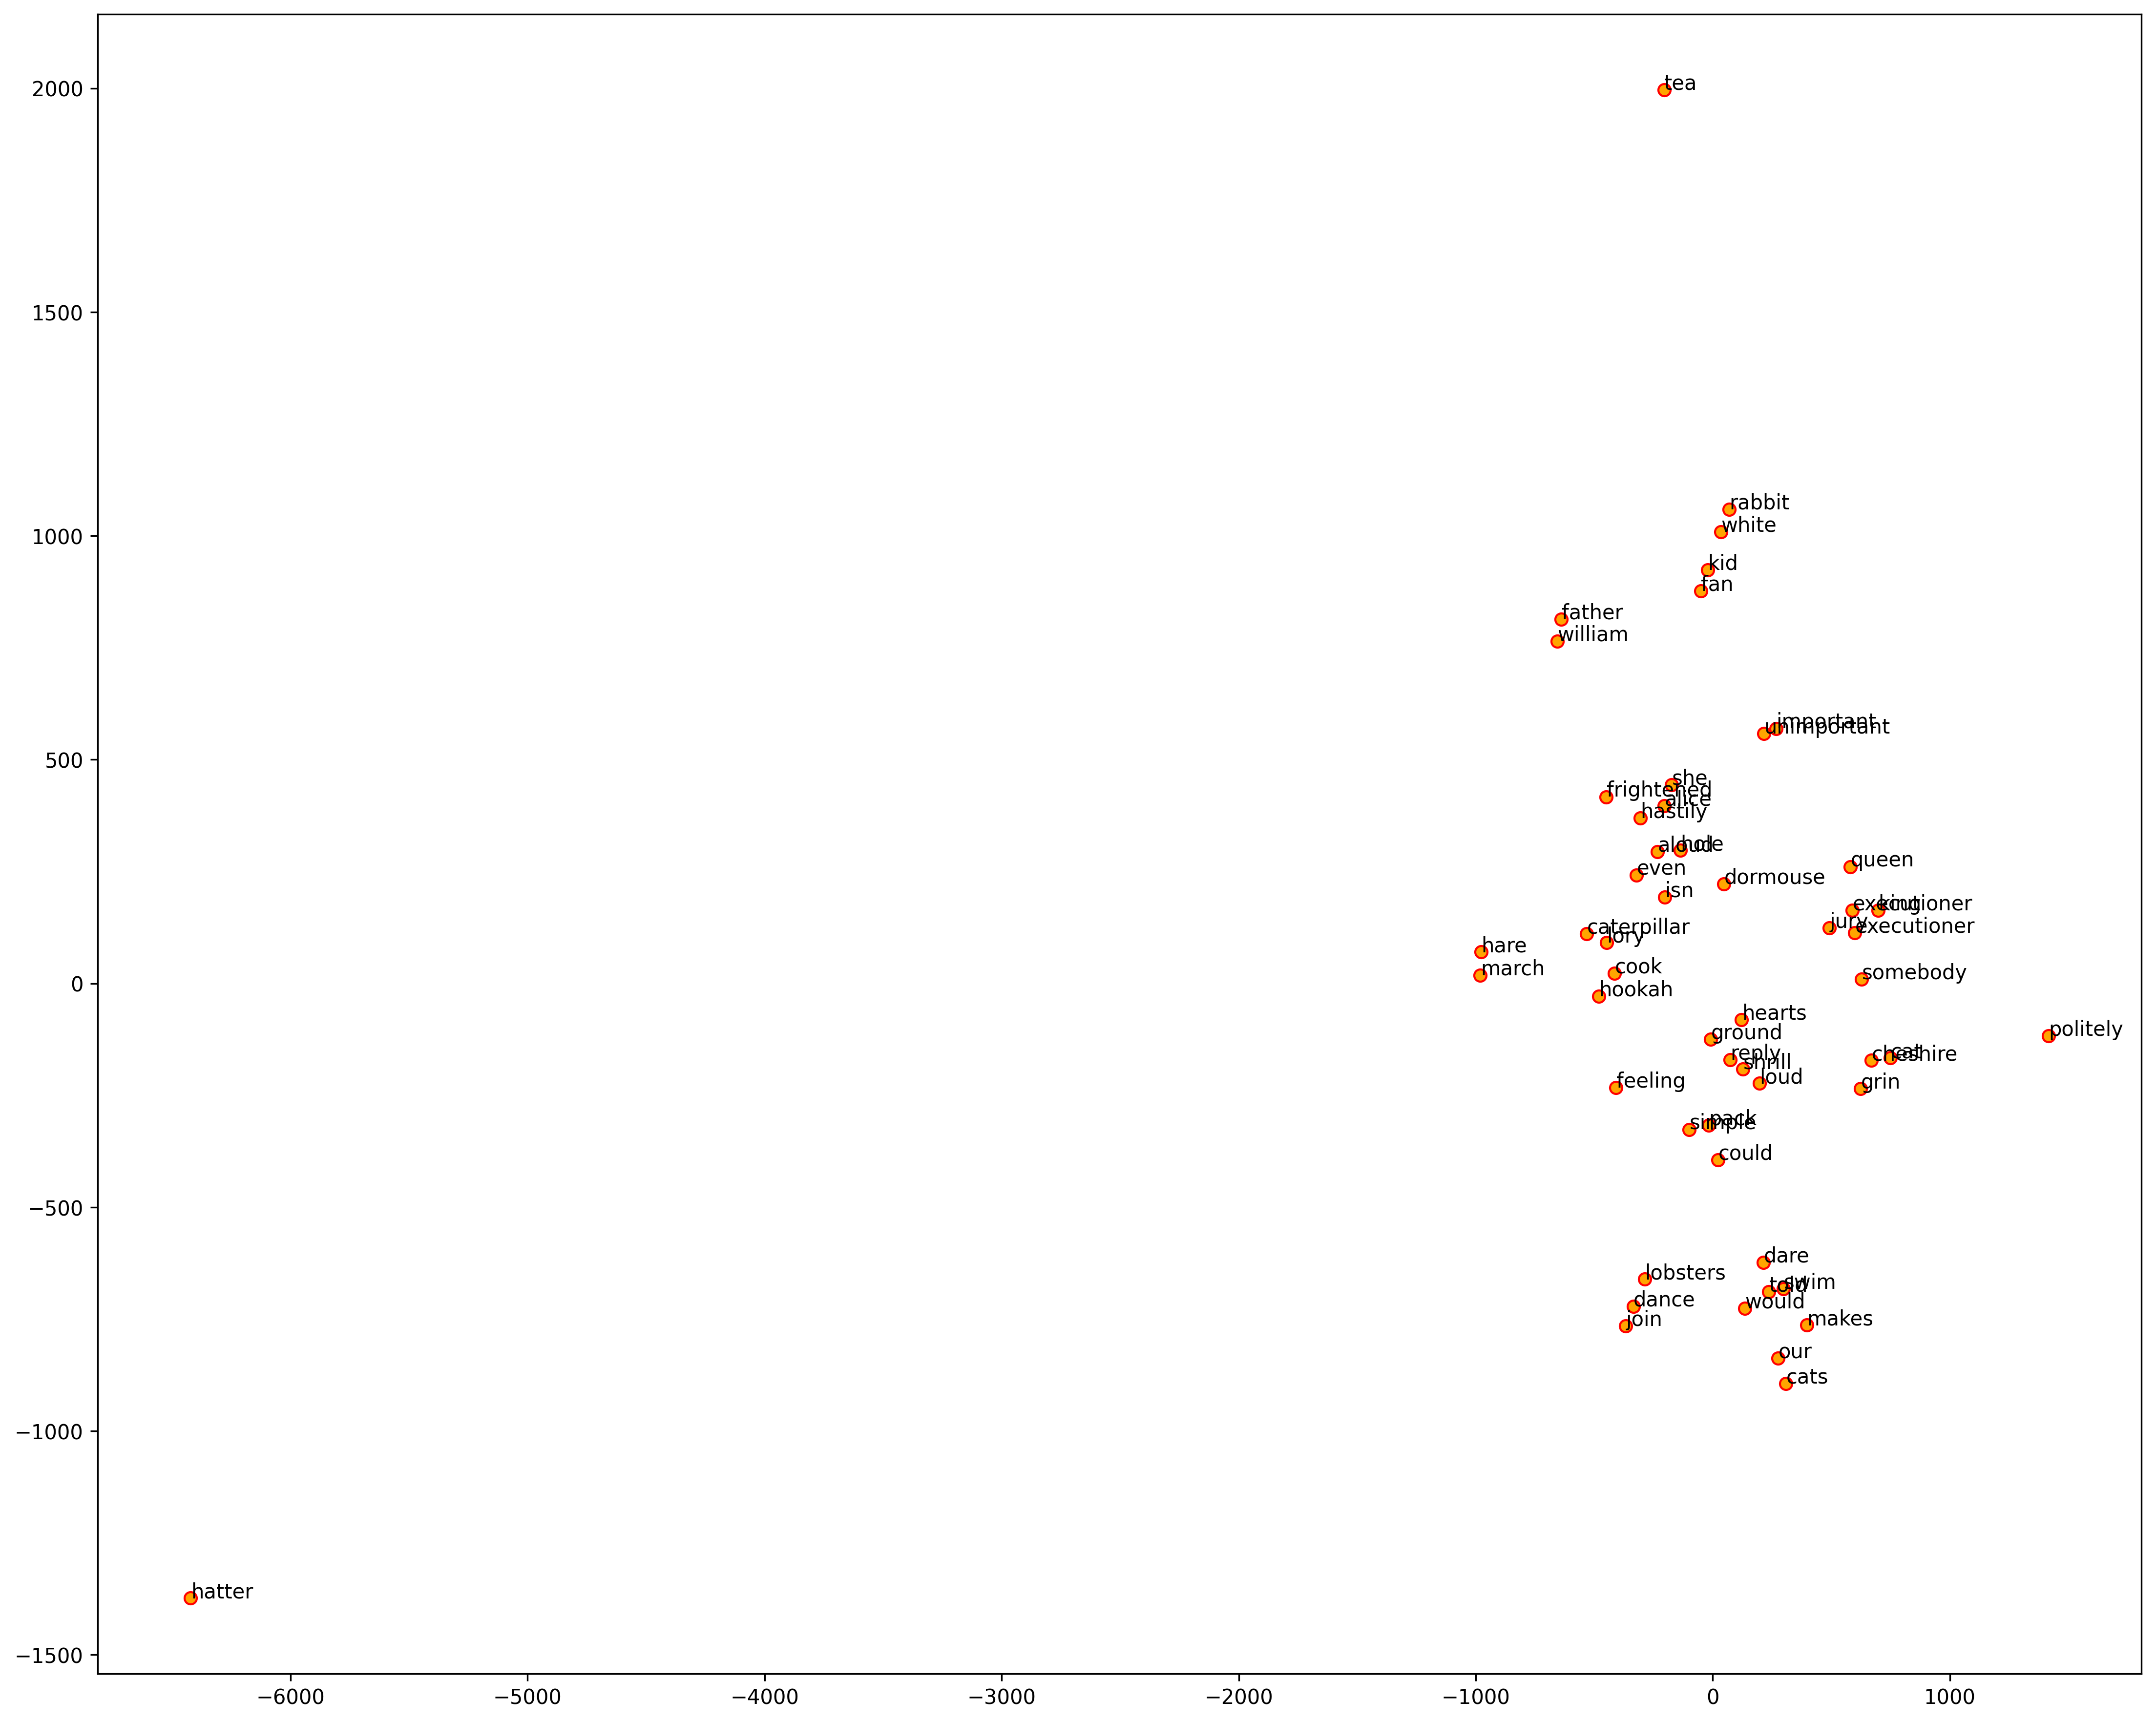

In [4]:
from sklearn.manifold import TSNE

words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = w2v_model_alice.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(18,15))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [5]:
%%time
from gensim.models.fasttext import FastText

wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in alice_norm if document != None]

# Set values for various parameters
feature_size = 100    # Word vector dimensionality  
window_context = 5          # Context window size                                                                                    
min_word_count = 5   # Minimum word count                        
sample = 1e-3   # Downsample setting for frequent words


ft_model_alice = FastText(tokenized_corpus, size=feature_size, window=window_context, 
                    min_count=min_word_count,sample=sample, sg=1, iter=50)

CPU times: user 14.7 s, sys: 2.48 s, total: 17.2 s
Wall time: 13.4 s


In [6]:
# view similar words based on gensim's model
similar_words2 = {search_term: [item[0] for item in w2v_model_alice.wv.most_similar([search_term], topn=3)]
                  for search_term in ['alice', 'rabbit', 'queen', 'king', 'cat','caterpillar','hatter','could','would']}
print(similar_words2)

{'alice': ['she', 'feeling', 'politely'], 'rabbit': ['white', 'kid', 'hole'], 'queen': ['executioner', 'hearts', 'reply'], 'king': ['executioner', 'important', 'unimportant'], 'cat': ['cheshire', 'cats', 'somebody'], 'caterpillar': ['hookah', 'father', 'cook'], 'hatter': ['hare', 'tea', 'dormouse'], 'could': ['pack', 'swim', 'even'], 'would': ['simple', 'makes', 'lobsters']}


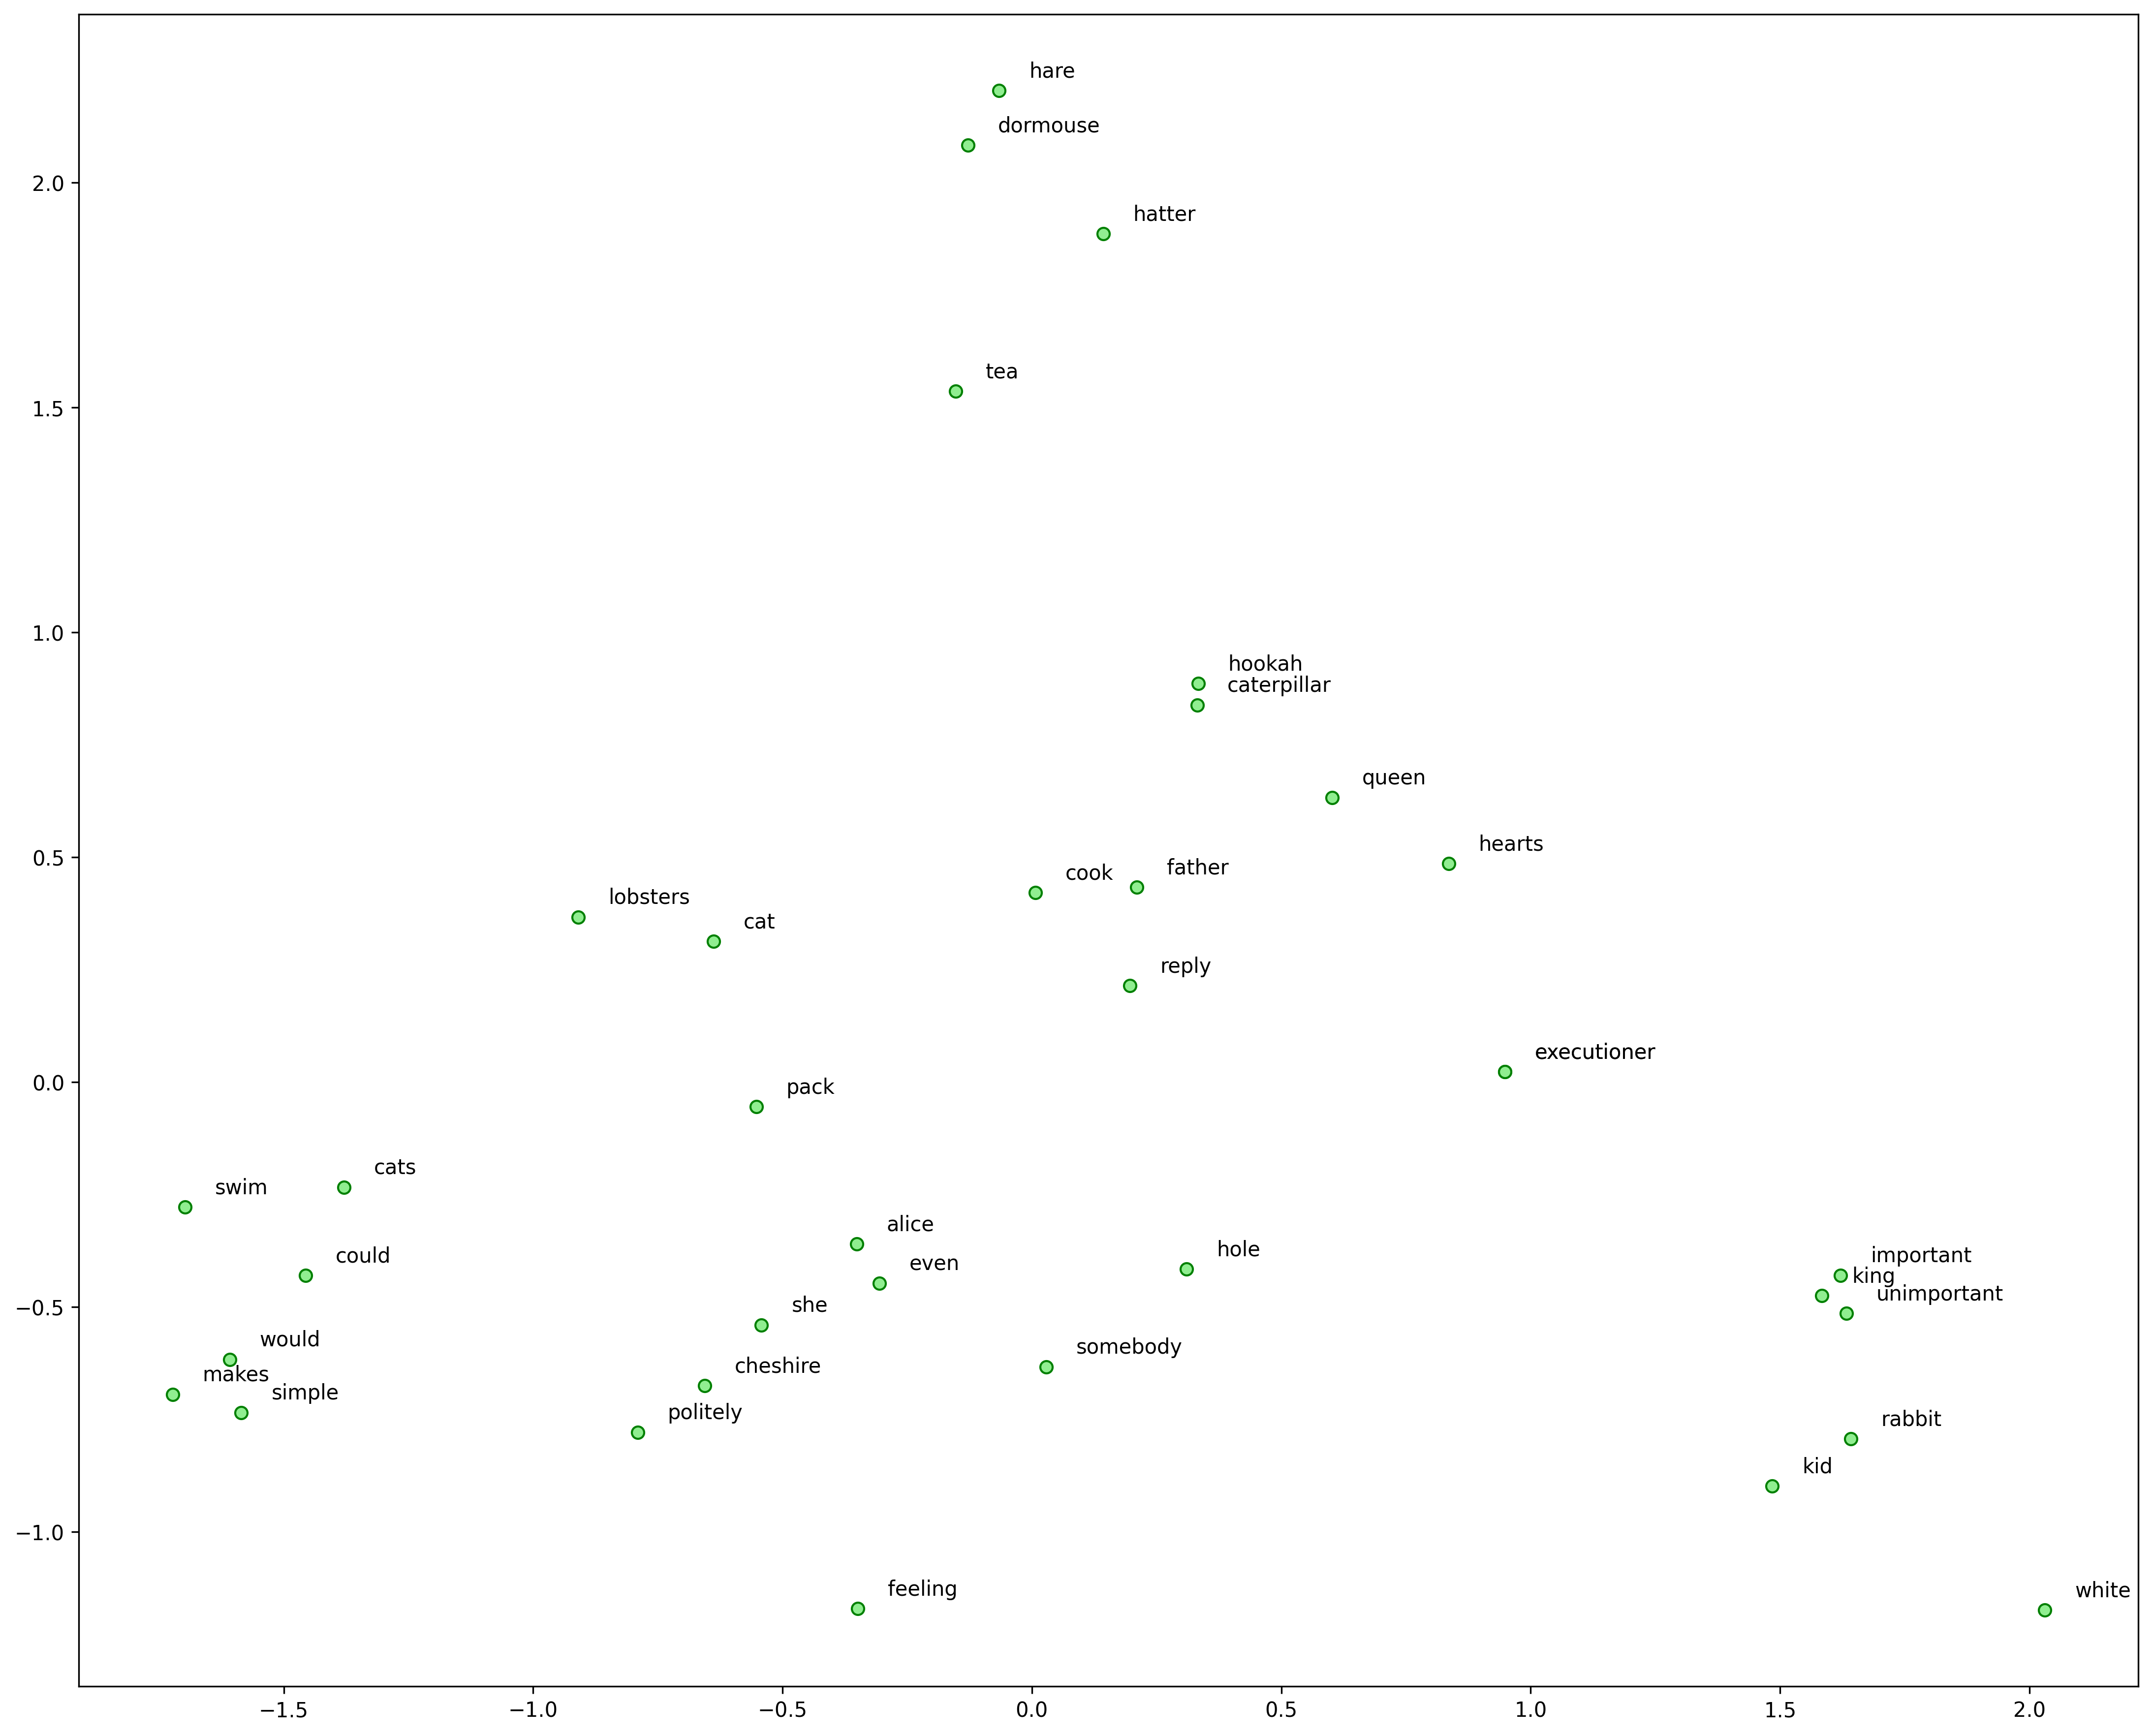

In [7]:
from sklearn.decomposition import PCA

words = sum([[k] + v for k, v in similar_words2.items()], [])
wvs = ft_model_alice.wv[words]

pca = PCA(n_components=2)
np.set_printoptions(suppress=True)
P = pca.fit_transform(wvs)
labels = words

plt.figure(figsize=(18, 15))
plt.scatter(P[:, 0], P[:, 1], c='lightgreen', edgecolors='g')
for label, x, y in zip(labels, P[:, 0], P[:, 1]):
    plt.annotate(label, xy=(x+0.06, y+0.03), xytext=(0, 0), textcoords='offset points')

- English Word Embeddings

## Question 2

- Chinese Word Embeddings on Presidential Inaugural Speech

In [ ]:
DEMO_DATA_ROOT = "../../../RepositoryData/data"

### Loading Corpus Raw Texts

In [ ]:
import nltk
from nltk.corpus.reader import PlaintextCorpusReader
import numpy as np
import jieba, re

jieba.set_dictionary(DEMO_DATA_ROOT + "/jiaba/dict.txt.big.txt")

In [ ]:
corpus_dir = DEMO_DATA_ROOT+"/TaiwanPresidentialInaugarationSpeech_en"

twp = PlaintextCorpusReader(corpus_dir, ".*\.txt")

In [ ]:
len(twp.raw())


### Word Segmentation

- Try two methods: `ckiptagger` vs. `jieba`

In [ ]:
from ckiptagger import WS, POS

In [ ]:
ws = WS("/Users/Alvin/Dropbox/Corpus/CKIP_WordSeg/data")
pos = POS("/Users/Alvin/Dropbox/Corpus/CKIP_WordSeg/data")

In [ ]:
## Print first 200 chars of file 13
print(twp.raw(fileids=twp.fileids()[13])[:200])

In [ ]:
# word-seg the raw text and return a long string
def tokenize_raw1(raw):
    word_tok = [' '.join(para) for para in ws(nltk.regexp_tokenize(raw, r'[^\s]+'))] # para-like units
    raw_tok  = ' '.join(word_tok)
    return raw_tok


# word-seg the raw text and return list of words
def tokenize_raw2(raw):
    para_list = nltk.regexp_tokenize(raw, r'[^\s]+') # para-like units
    word_list = sum(ws(para_list),[]) 
    return word_list


def tokenize_raw3(raw):
    raw = re.sub(r'[\n\s\r]+', '', raw)
    return ' '.join([w for w in jieba.cut(raw)])

tokenize_corpus1 = np.vectorize(tokenize_raw1)
tokenize_corpus2 = np.vectorize(tokenize_raw2)
tokenize_corpus3 = np.vectorize(tokenize_raw3)

The following experiments try to see whether a few parameters may impact the performance of Chinese tokenization:

1. Segmenter: `ckiptagger` vs. `jibea`
2. Data Structure: `List` vs. `numpy.array`

It seems that `jieba` with `List` structure is the fastest?

In [ ]:
twp_corpus = np.array([twp.raw(fileids=fid) for fid in twp.fileids()])
twp_corpus_list = [twp.raw(fileids=fid) for fid in twp.fileids()]

In [ ]:
%%time
twp_corpus_seg1a = tokenize_corpus1(twp_corpus)

In [ ]:
%%time
twp_corpus_seg1b = tokenize_corpus1(twp_corpus_list)

In [ ]:
%%time
twp_corpus_seg3a = tokenize_corpus3(twp_corpus)

In [ ]:
%%time
twp_corpus_seg3b = tokenize_corpus3(twp_corpus_list)

In [ ]:
twp_corpus[13,][:200]

In [ ]:
twp_corpus_seg1a[13][:200]

In [ ]:
twp_corpus_seg3a[13][:200]

### Data Frame Representation

In [ ]:
## data frame representation
import pandas as pd
import re


twp_df = pd.DataFrame({
    "fileid": twp.fileids(),
    "corpus_raw": twp_corpus,
    "corpus_seg_ckip": twp_corpus_seg1a,
    "corpus_seg_jb": twp_corpus_seg3a
})
twp_df[['year','id','president']] = twp_df['fileid'].str.split('_', expand=True)
twp_df['president']=twp_df['president'].str.replace('.txt','')
twp_df

### Word Cloud

In [ ]:
## choose one version of segmented texts
twp_corpus_seg = twp_corpus_seg1a

In [ ]:
wst =nltk.WhitespaceTokenizer()
tokenized_corpus = [wst.tokenize(text) for text in twp_corpus_seg]

In [ ]:
## Concordance

twp_text = nltk.text.Text(sum(tokenized_corpus,[]))
twp_text.concordance('台灣')

In [ ]:
from collections import Counter
import imageio
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from matplotlib import pyplot as plt

words = sum(tokenized_corpus,[])
words[:5]
sorted(Counter(words).items(), key=lambda x:x[1], reverse=True)  



## Check font paths
## !fc-list :lang=zh


## Load stopwords
with open(DEMO_DATA_ROOT+'/stopwords/tomlinNTUB-chinese-stopwords.txt') as f:
    stopwords = [w.strip() for w in f.readlines()]

In [ ]:
# Create stopwords ad hoc
stopwords = set(['一個'])
wordcloud = WordCloud(font_path="/System/Library/Fonts/PingFang.ttc",
                      background_color='ghostwhite',
                      #stopwords=stopwords,
                      width=1600, height=800 
                     )  ##add  system chinese font path
wordcloud.generate(' '.join([w for w in words if w not in stopwords]))
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
#plt.savefig('../data/twp-wordcloud2.png', facecolor='k', bbox_inches='tight')



In [ ]:

back_color = imageio.imread(DEMO_DATA_ROOT+ '/image/tw-char.jpg')
wordcloud = WordCloud(font_path="/System/Library/Fonts/PingFang.ttc",
                      background_color='white',
                      mask=back_color,
                      random_state=10,
                      max_words=350,
                      #max_font_size=40,
                      min_font_size=5,
                      width=2000,
                      height=1600)
wordcloud.generate(' '.join([w for w in words if w not in stopwords]))
image_colors = ImageColorGenerator(back_color)
plt.figure(figsize=(15,10), facecolor='w', dpi = 300)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

fig_path = 'twp-wordcloud.png'
wordcloud.to_file(fig_path)

### Creating Word Embeddings

In [ ]:
## Set features for parameters
embedding_size = 100
context_size = 10
min_word_count = 5
sample = 1e-3

In [ ]:
%%time
from gensim.models import word2vec

w2v_model = word2vec.Word2Vec(tokenized_corpus, 
                              size=embedding_size,
                              window=context_size,
                              min_count=min_word_count,
                              sample=sample,
                              iter=50)

### Exploring Semantic Similarities

In [ ]:
## View Similar Words
w2v_model.wv.most_similar('人民', topn=5)
w2v_model.wv.most_similar('台灣', topn=5)

In [ ]:
similar_words = {key_word:[similar_word[0] for similar_word in w2v_model.wv.most_similar(key_word, topn=6)]
                          for key_word in ['台灣','人民','國家','民主','中共','大陸','共匪','自由','美國']}
similar_words

### Visualization

In [ ]:
## Visualization

from sklearn.manifold import TSNE
all_words = sum([[key_word]+similar_words for key_word, similar_words in similar_words.items()], [])
all_words_vec = w2v_model.wv[all_words]

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(all_words_vec)
labels=all_words

In [ ]:
## Chinese Font Issues in Plotting

from matplotlib import rcParams
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
# rcParams['axes.unicode_minus']=False
rcParams['figure.dpi'] = 300
myfont = FontProperties(fname='/System/Library/Fonts/PingFang.ttc')

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6), dpi=300)
plt.scatter(T[:,0],T[:,1], c="orange", edgecolors='r', alpha=0.7, s=10)
for label,x,y in zip(labels, T[:,0],T[:,1]):
    plt.annotate(label, xy=(x, y), xytext=(-20,0), size=8, textcoords='offset points',fontproperties=myfont)

## Question 3

Use pre-trained embeddings for cluster documents.

For word tokenization:

- Use spacy `en_core_web_lg`
- Cluster documents based on their average word embeddings (300 dimensions)
- No filtering of words

In [8]:
import spacy
from nltk.corpus import inaugural

nlp = spacy.load('en_core_web_lg')

In [9]:
total_vectors = len(nlp.vocab.vectors)
print('Total Word Vectors:', total_vectors)

Total Word Vectors: 684830


- Use spacy to get the document vectors to cluster 

In [18]:
%%time
# get doc-level averaged vectors

usp_corpus = [inaugural.raw(fileids=fid) for fid in inaugural.fileids()]

usp_corpus_pipe = nlp.pipe(usp_corpus)
usp_corpus_vec = np.vstack([doc.vector for doc in usp_corpus_pipe if doc.has_vector])


CPU times: user 20.5 s, sys: 1.91 s, total: 22.5 s
Wall time: 22.9 s


In [19]:
usp_corpus_vec.shape

(58, 300)

In [20]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

textid = [f[:-4] for f in inaugural.fileids()]
similarity_doc_matrix = cosine_similarity(usp_corpus_vec)
similarity_doc_df = pd.DataFrame(similarity_doc_matrix,
                                index=textid,
                                columns=textid)
similarity_doc_df

,1789-Washington,1793-Washington,1797-Adams,1801-Jefferson,1805-Jefferson,1809-Madison,1813-Madison,1817-Monroe,1821-Monroe,1825-Adams,...,1981-Reagan,1985-Reagan,1989-Bush,1993-Clinton,1997-Clinton,2001-Bush,2005-Bush,2009-Obama,2013-Obama,2017-Trump
1789-Washington,1.000000,0.984878,0.995147,0.995411,0.995921,0.996675,0.994359,0.996029,0.995247,0.992055,...,0.986210,0.984592,0.979744,0.979804,0.983050,0.983414,0.988405,0.985737,0.985897,0.976485
1793-Washington,0.984878,1.000000,0.979064,0.980040,0.979855,0.980850,0.979593,0.978495,0.979905,0.978952,...,0.969932,0.968063,0.963082,0.961651,0.964160,0.966520,0.974160,0.966003,0.967889,0.959819
1797-Adams,0.995147,0.979064,1.000000,0.996836,0.996357,0.995833,0.994133,0.995444,0.995159,0.992922,...,0.987519,0.987122,0.980362,0.982656,0.985610,0.986268,0.991875,0.986466,0.985879,0.980082
1801-Jefferson,0.995411,0.980040,0.996836,1.000000,0.997605,0.995725,0.993608,0.995258,0.992867,0.990582,...,0.992771,0.991856,0.987243,0.989480,0.990766,0.991621,0.995475,0.992918,0.992549,0.986645
1805-Jefferson,0.995921,0.979855,0.996357,0.997605,1.000000,0.996422,0.994365,0.996315,0.995215,0.990830,...,0.990597,0.988671,0.982631,0.985335,0.986885,0.988334,0.992062,0.990233,0.990316,0.982970
1809-Madison,0.996675,0.980850,0.995833,0.995725,0.996422,1.000000,0.996375,0.997183,0.995316,0.995387,...,0.985634,0.984529,0.976437,0.980069,0.984644,0.983880,0.990701,0.985869,0.986502,0.977609
1813-Madison,0.994359,0.979593,0.994133,0.993608,0.994365,0.996375,1.000001,0.995724,0.995724,0.994184,...,0.985924,0.985979,0.977283,0.980455,0.985236,0.983550,0.990505,0.986500,0.986124,0.978471
1817-Monroe,0.996029,0.978495,0.995444,0.995258,0.996315,0.997183,0.995724,1.000000,0.998122,0.993730,...,0.990336,0.989043,0.982400,0.984682,0.988608,0.987530,0.992253,0.989618,0.989983,0.983361
1821-Monroe,0.995247,0.979905,0.995159,0.992867,0.995215,0.995316,0.995724,0.998122,0.999999,0.993530,...,0.987214,0.986302,0.978821,0.980137,0.984373,0.982719,0.988643,0.985501,0.984886,0.978818
1825-Adams,0.992055,0.978952,0.992922,0.990582,0.990830,0.995387,0.994184,0.993730,0.993530,1.000001,...,0.977643,0.978597,0.966633,0.971966,0.979890,0.975559,0.986688,0.978106,0.978866,0.970515


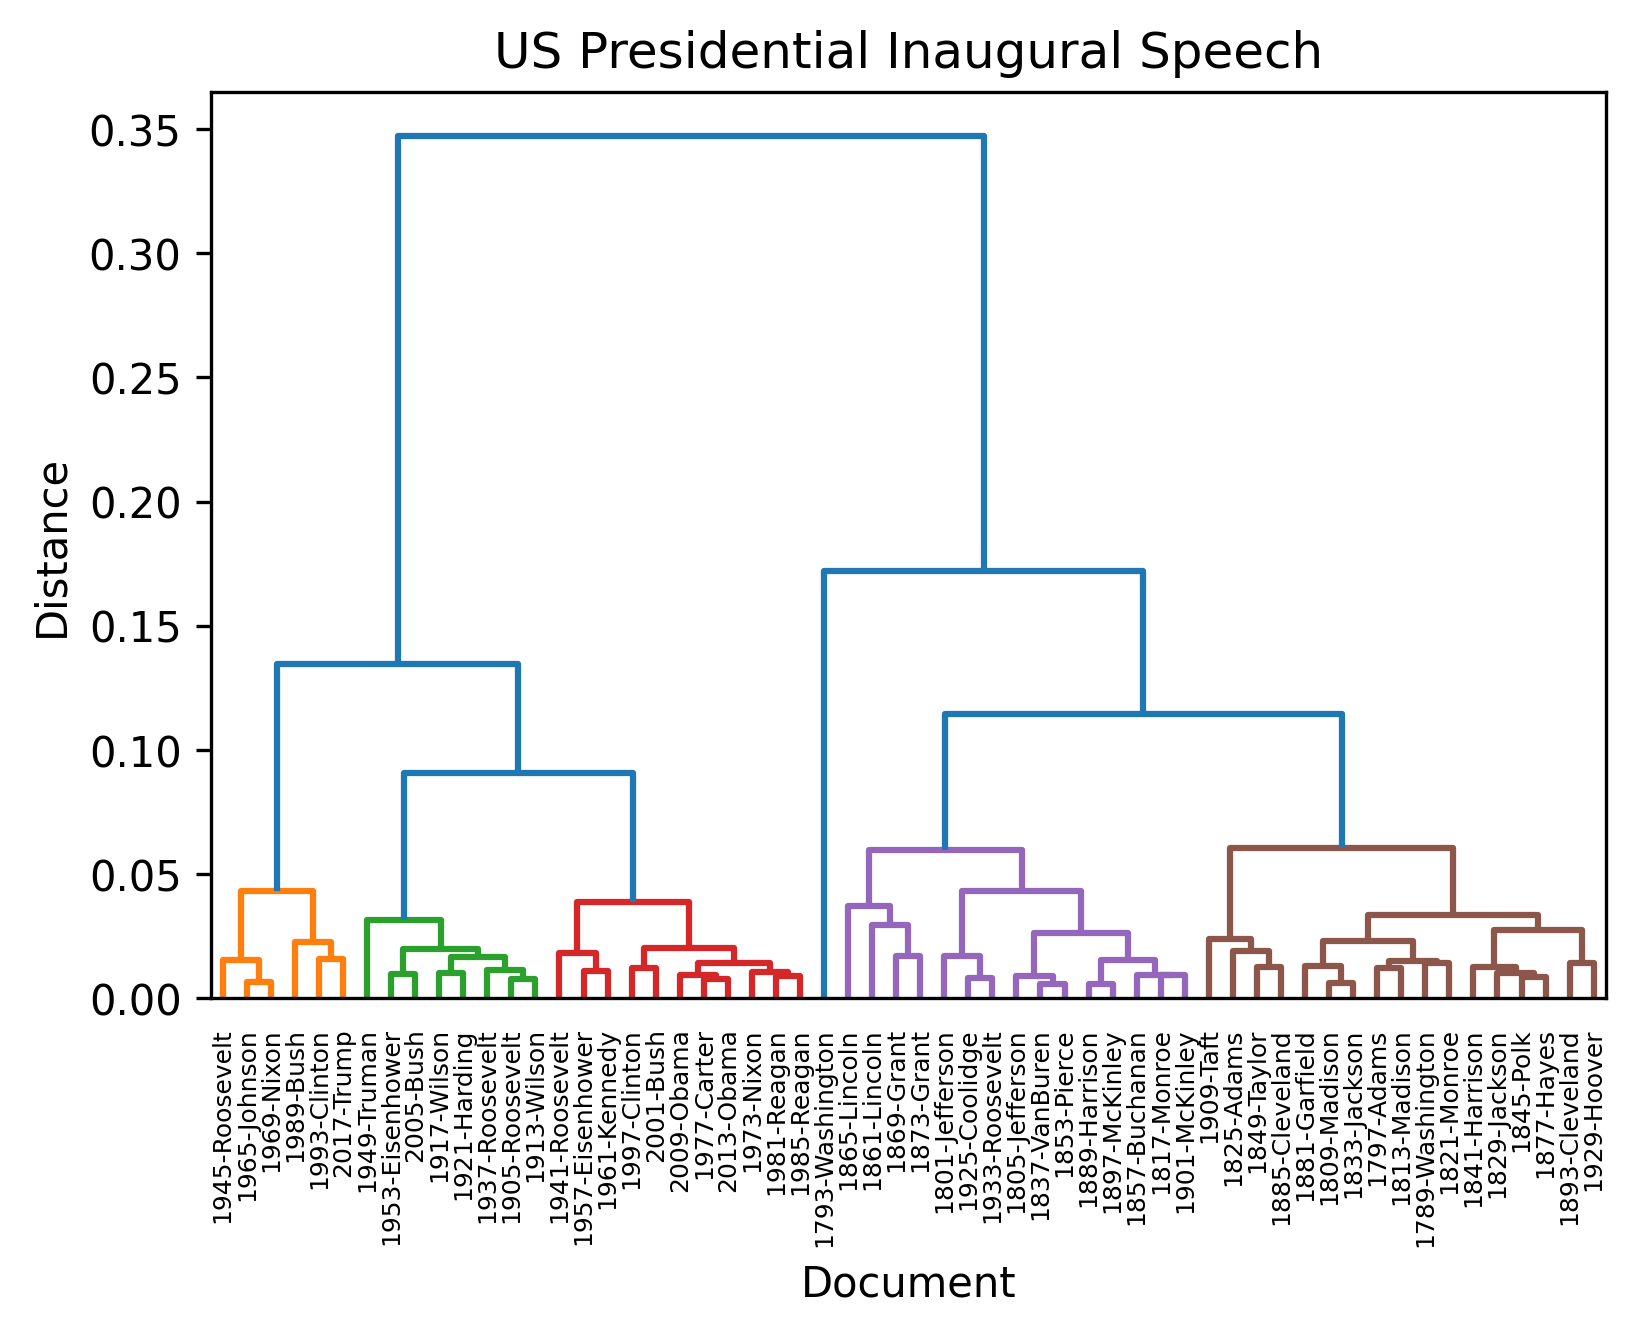

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(similarity_doc_matrix, 'ward')
plt.title('US Presidential Inaugural Speech')
plt.xlabel('Document')
plt.ylabel('Distance')
dendrogram(Z,labels=textid, leaf_rotation=90, color_threshold=0.07)
plt.axhline(y=1.0, c='k', ls='--',lw=0.5)

## Question 4

- Use ckip-transformer
    - word segmentation and pos-tagging
    - filter words whose POS initial 'N'
    - get GloVe 

In [50]:
import nltk
from nltk.corpus.reader import PlaintextCorpusReader
import numpy as np
import re

DEMO_DATA_ROOT = "../../../RepositoryData/data"
corpus_dir = DEMO_DATA_ROOT+"/TaiwanPresidentialInaugarationSpeech_en"
twp = PlaintextCorpusReader(corpus_dir, ".*\.txt")
twp_corpus= [twp.raw(fileids=f) for f in twp.fileids()]


nlp = spacy.load('zh_core_web_lg')

In [51]:
# %%time
# ##################################################################
# ## CKIP-transformer word-pos the entire corpus                  ##
# ##################################################################

# import ckip_transformers
# from ckip_transformers.nlp import CkipWordSegmenter, CkipPosTagger


# # Initialize drivers
# ws_driver = CkipWordSegmenter(level=3, device=-1)
# pos_driver = CkipPosTagger(level=3, device=-1)

# d = '這是一個中文句子'

# def word_pos(string, ws_driver, pos_driver):
#     cur_w = ws_driver([string],use_delim=True)
#     cur_pos = pos_driver(cur_w)
    
#     return [(w,p) for (w,p) in zip(cur_w[0], cur_pos[0])]
# word_pos(d, ws_driver, pos_driver)
# # word_pos(twp_corpus[0], ws_driver, pos_driver)

# # twp_corpus_seg4 = [word_pos(d, ws_driver, pos_driver) for d in twp_corpus]

# ##################################################################
# ## Pickle results                                               ##
# ##################################################################

# # import pickle
# # with open('twp_corpus_seg4.pickle', 'wb') as f:
# #     pickle.dump(twp_corpus_seg4, f, protocol=pickle.HIGHEST_PROTOCOL)

In [52]:
## Load ckip-transformer segmented version
## each file is a list of (word, pos) tuples
## use the pos to filter words
import pickle
with open('twp_corpus_seg4.pickle', 'rb') as f:
    twp_corpus_seg4 = pickle.load(f)
print(len(twp_corpus_seg4))


###########################################################################
## Add new file to the pickle without rerunning the entire pos-tagging
###########################################################################
# %%time
# print(len(twp_corpus_seg4))
# twp_corpus_seg4.append(word_pos(twp_corpus[14], ws_driver, pos_driver))
# print(len(twp_corpus_seg4))

15


In [59]:
twp_corpus_seg4[14][:50]

[('各位', 'Nh'),
 ('友邦', 'Nc'),
 ('的', 'DE'),
 ('元首', 'Na'),
 ('與', 'Caa'),
 ('貴賓', 'Na'),
 ('、', 'PAUSECATEGORY'),
 ('各', 'Nes'),
 ('國', 'Nc'),
 ('駐', 'VCL'),
 ('臺', 'Nc'),
 ('使節', 'Na'),
 ('及', 'Caa'),
 ('代表', 'Na'),
 ('、', 'PAUSECATEGORY'),
 ('現場', 'Nc'),
 ('的', 'DE'),
 ('好朋友', 'Na'),
 ('，', 'COMMACATEGORY'),
 ('全體', 'Na'),
 ('國人', 'Na'),
 ('同胞', 'Na'),
 ('，', 'COMMACATEGORY'),
 ('大家', 'Nh'),
 ('好', 'VH'),
 ('：', 'COLONCATEGORY'),
 ('\n', 'WHITESPACE'),
 ('\n', 'WHITESPACE'),
 ('感謝', 'VK'),
 ('與', 'Caa'),
 ('承擔', 'VC'),
 ('\n', 'WHITESPACE'),
 ('就', 'D'),
 ('在', 'P'),
 ('剛剛', 'D'),
 ('，', 'COMMACATEGORY'),
 ('我', 'Nh'),
 ('和', 'Caa'),
 ('陳建仁', 'Nb'),
 ('已經', 'D'),
 ('在', 'VCL'),
 ('總統府', 'Nc'),
 ('裡面', 'Ncd'),
 ('，', 'COMMACATEGORY'),
 ('正式', 'VH'),
 ('宣誓', 'VE'),
 ('就任', 'VG'),
 ('中華民國', 'Nc'),
 ('第十四', 'Neu'),
 ('任', 'Nf')]

In [60]:
# filter word tokens based don POS
#twp_tokens = [[w for (w,p) in doc if p[0] in ['N','V']] for doc in twp_corpus_seg4]
twp_tokens = [[w for (w,p) in doc if len(p)<=4] for doc in twp_corpus_seg4]

In [61]:
%%time
twp_tokens_vec = np.vstack(
    [np.vstack([nlp(w).vector for w in d]).mean(axis=0) for d in twp_tokens]
)# axis=0 get column sums


CPU times: user 2min 59s, sys: 1.18 s, total: 3min
Wall time: 3min 19s


In [62]:
twp_tokens_vec.shape


(15, 300)

In [63]:
textid = [f[:-4] for f in twp.fileids()]
similarity_doc_matrix = cosine_similarity(twp_tokens_vec)
similarity_doc_df = pd.DataFrame(similarity_doc_matrix,
                                index=textid,
                                columns=textid)
similarity_doc_df

,1948_1_JIANGZHONGZHENG,1954_2_JIANGZHONGZHENG,1960_3_JIANGZHONGZHENG,1966_4_JIANGZHONGZHENG,1972_5_JIANGZHONGZHENG,1978_6_JIANGJINGGUO,1984_7_JIANGJINGGUO,1990_8_LIDENGHUI,1996_9_LIDENGHUI,2000_10_CHENSHUIBIAN,2004_11_CHENSHUIBIAN,2008_12_MAYANGJIU,2012_13_MAYANGJIU,2016_14_CAYANGWEN,2020_15_CAYANGWEN
1948_1_JIANGZHONGZHENG,1.000000,0.985627,0.981232,0.965179,0.949978,0.988248,0.975657,0.982243,0.985900,0.987231,0.986692,0.980455,0.972849,0.974946,0.976299
1954_2_JIANGZHONGZHENG,0.985627,1.000000,0.991394,0.979616,0.953108,0.987037,0.951434,0.962869,0.973823,0.981131,0.978606,0.961651,0.949542,0.950532,0.951906
1960_3_JIANGZHONGZHENG,0.981232,0.991394,1.000000,0.983092,0.959223,0.988496,0.960238,0.965506,0.976752,0.977978,0.974651,0.964379,0.954721,0.951598,0.953175
1966_4_JIANGZHONGZHENG,0.965179,0.979616,0.983092,1.000000,0.980073,0.970618,0.952876,0.942376,0.955721,0.957353,0.951970,0.941041,0.930210,0.925379,0.926220
1972_5_JIANGZHONGZHENG,0.949978,0.953108,0.959223,0.980073,1.000000,0.952888,0.952956,0.940802,0.939708,0.934869,0.929428,0.919957,0.914989,0.897766,0.899317
1978_6_JIANGJINGGUO,0.988248,0.987037,0.988496,0.970618,0.952888,1.000000,0.970226,0.975380,0.985753,0.987611,0.982094,0.975832,0.966259,0.963024,0.964227
1984_7_JIANGJINGGUO,0.975657,0.951434,0.960238,0.952876,0.952956,0.970226,1.000000,0.976908,0.978380,0.968354,0.965434,0.976530,0.971699,0.966244,0.966440
1990_8_LIDENGHUI,0.982243,0.962869,0.965506,0.942376,0.940802,0.975380,0.976908,1.000000,0.989875,0.981773,0.983571,0.982701,0.986612,0.968347,0.970363
1996_9_LIDENGHUI,0.985900,0.973823,0.976752,0.955721,0.939708,0.985753,0.978380,0.989875,1.000000,0.993962,0.991728,0.993690,0.988530,0.982831,0.983564
2000_10_CHENSHUIBIAN,0.987231,0.981131,0.977978,0.957353,0.934869,0.987611,0.968354,0.981773,0.993962,1.000000,0.995687,0.990095,0.980922,0.980913,0.981304


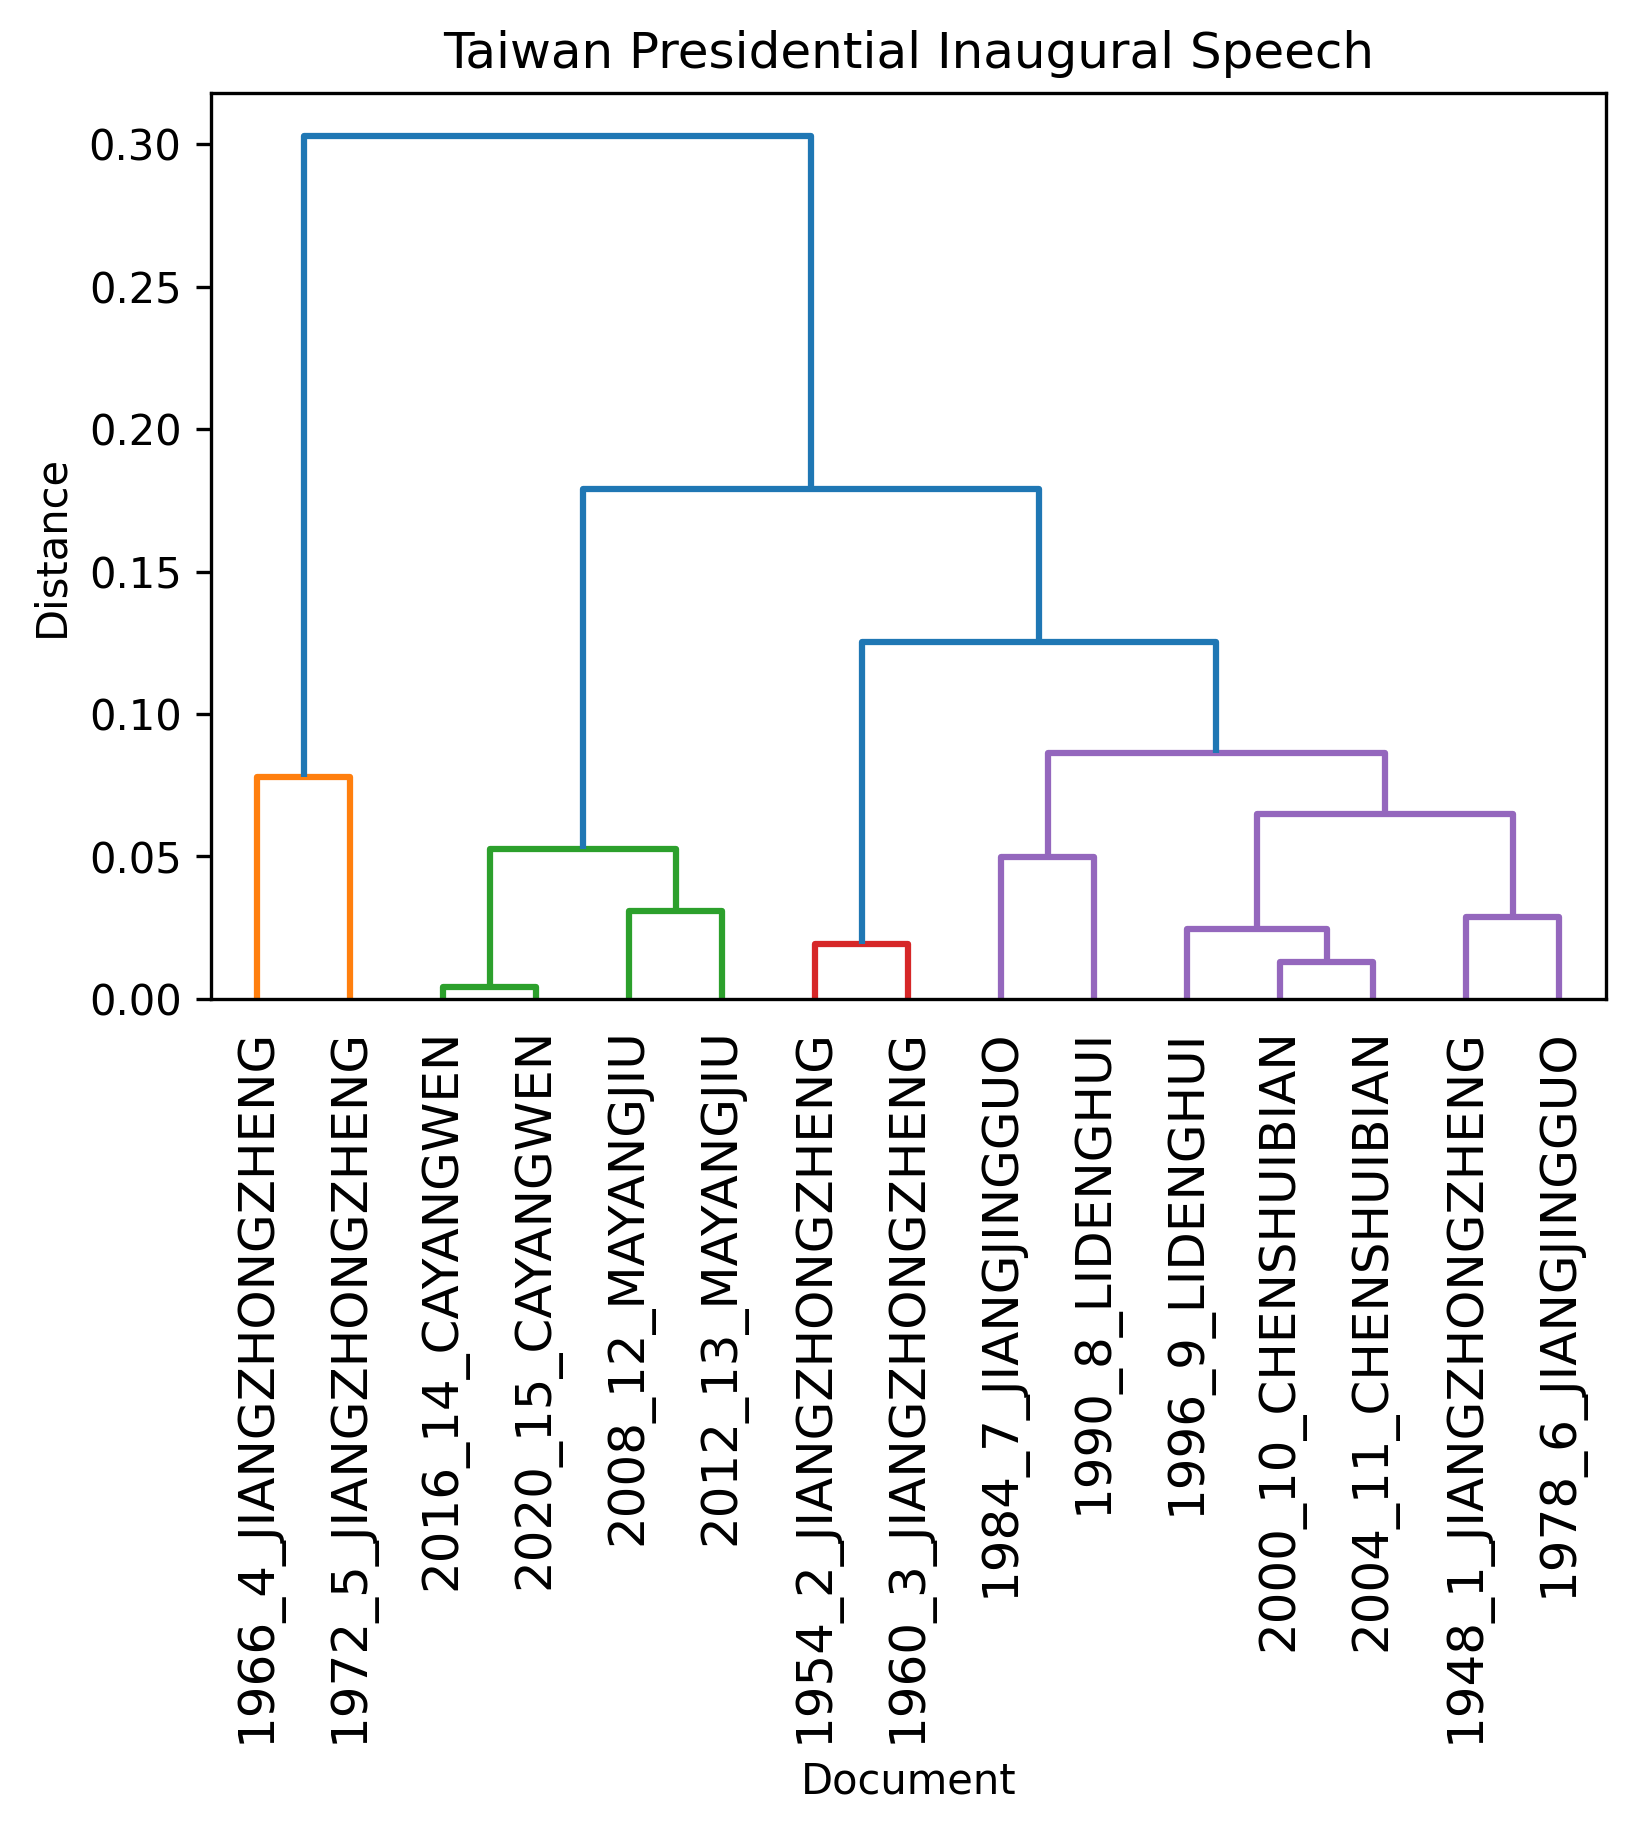

In [64]:
Z = linkage(similarity_doc_matrix, 'ward')
plt.title('Taiwan Presidential Inaugural Speech')
plt.xlabel('Document')
plt.ylabel('Distance')
dendrogram(Z,labels=textid, leaf_rotation=90, color_threshold=0.10)
plt.axhline(y=1.0, c='k', ls='--',lw=0.5)